In [2]:
import numpy as np
from pymatgen import Composition, Element
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
#load main group element

element_list_main_path="../data_set/element_list/elements_list_main.txt"
with open(element_list_main_path, "r") as text_file:
    a=text_file.read()
elements_list_main=a.split()

In [4]:
#load main group element number
raw_number_list_path="../data_set/element_list/elements_list_main_number.txt"
raw_number=np.loadtxt(raw_number_list_path,dtype="int")

In [6]:
#load element vector data
vector_data_path="../data_set/element_vector_generation/PCA/PCA_vector.csv"
from numpy import genfromtxt
my_data = genfromtxt(vector_data_path, delimiter=',')
F=my_data[:,:20]
F=F[raw_number,:]

In [7]:
F[0]

array([ 0.10908964,  0.22776807, -0.10772757,  0.00939778, -0.20057408,
        0.06487458,  0.01493972, -0.03424391,  0.00510851, -0.00046015,
        0.01699813,  0.0494394 , -0.00999712,  0.09370692,  0.10927261,
        0.3388032 , -0.11867518, -0.24349617,  0.08894224,  0.37412883])

In [40]:
#normalize F
#from sklearn.preprocessing import normalize
#F_norm=normalize(F, norm='l2', axis=1)

In [41]:
#F=F_norm

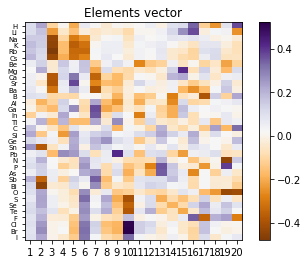

In [8]:
vegetables = elements_list_main
farmers = list(range(1,21))

harvest = F


fig, ax = plt.subplots()
im = ax.imshow(harvest,aspect=20/34,cmap="PuOr")
#figure(num=None, figsize=(10, 20), dpi=1000, facecolor='w', edgecolor='k')
# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables,fontsize=7)
fig.colorbar(im)
# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         #rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
    #for j in range(len(farmers)):
        #text = ax.text(j, i, harvest[i, j],
                       #ha="center", va="center", color="w")

ax.set_title("Elements vector")
#fig.tight_layout()
plt.show()
fig.savefig("test_mapping.pdf",format="pdf",dpi=1000)

In [32]:
ax_combo_colormap=ax
figure_combo_colormap=fig

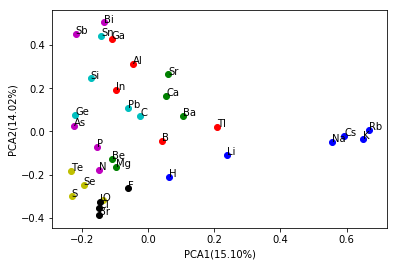

In [12]:
from sklearn.decomposition import PCA
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
pca=PCA(n_components=None, copy=True, whiten=False)

pcaTransformed_lat = pca.fit_transform(F)
first2pca = pcaTransformed_lat[:,:2]
data_main = first2pca[:,:]
data_main.shape
#data_main_flip=np.flip(data_main,axis=1)

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
'''
elements_list_main[0:6]
elements_list_main[6:11]
elements_list_main[11:16]
elements_list_main[16:21]
elements_list_main[21:26]
elements_list_main[26:30]
elements_list_main[30:]
'''
fig,ax= plt.subplots()
ax.scatter(data_main[:6,0],data_main[:6,1],color='b')
ax.scatter(data_main[6:11,0],data_main[6:11,1],color='g')
ax.scatter(data_main[11:16,0],data_main[11:16,1],color='r')
ax.scatter(data_main[16:21,0],data_main[16:21,1],color='c')
ax.scatter(data_main[21:26,0],data_main[21:26,1],color='m')
ax.scatter(data_main[26:30,0],data_main[26:30,1],color='y')
ax.scatter(data_main[30:,0],data_main[30:,1],color='k')
#plt.xlim(-0.4,0.75)
#plt.ylim(-0.5,0.75)
for i in range(len(elements_list_main)):
    txt = elements_list_main[i]
    ax.annotate(txt, (data_main[i,0], data_main[i,1]))
plt.xlabel("PCA1(15.10%)")
plt.ylabel("PCA2(14.02%)")
fig.savefig("test_scatter.pdf",format="pdf",dpi=1000)

In [11]:
pca.explained_variance_ratio_

array([0.15097685, 0.14019786, 0.10347072, 0.0982825 , 0.08107286,
       0.07825746, 0.06759472, 0.06470969, 0.0607602 , 0.05685796,
       0.04915289, 0.02002466, 0.00956284, 0.00749965, 0.00508519,
       0.00297538, 0.00143688, 0.00109395, 0.00071954, 0.00026821])